In [4]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Getting the data

In [5]:
response = requests.get("https://uadata.net/work-positions/cities.json")
data_json = response.json()

Creating the dataframe

In [6]:
df = pd.DataFrame(data_json["data"])

In [7]:
df.head()

,at,val
0,2022-05-23,31876
1,2022-05-24,31626
2,2022-05-25,31928
3,2022-05-26,34621
4,2022-05-27,35312


In [8]:
df.shape

(387, 2)

In [9]:
df.columns

Index(['at', 'val'], dtype='object')

In [10]:
df.dtypes

at     object
val     int64
dtype: object

Preparing the data

In [11]:
df["at"] = pd.to_datetime(df["at"])

In [12]:
df.dtypes

at     datetime64[ns]
val             int64
dtype: object

In [13]:
df = df.rename(columns = {"at": "Date", "val": "Vacancies"})

In [14]:
df.head()

,Date,Vacancies
0,2022-05-23,31876
1,2022-05-24,31626
2,2022-05-25,31928
3,2022-05-26,34621
4,2022-05-27,35312


In [15]:
df.set_index('Date', inplace=True)

Graphs building

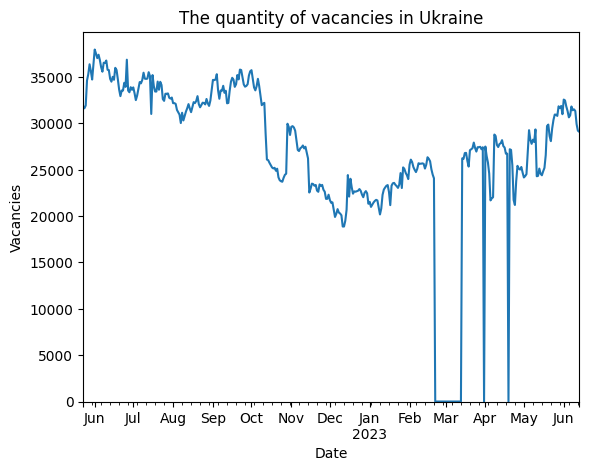

In [16]:
df["Vacancies"].plot()
plt.title("The quantity of vacancies in Ukraine")
plt.xlabel("Date")
plt.ylabel("Vacancies")
plt.ylim(bottom=0)
plt.show()

In [17]:
df["Vacancies"] = df['Vacancies'].replace(0, np.nan)
df["Vacancies"] = df['Vacancies'].interpolate()

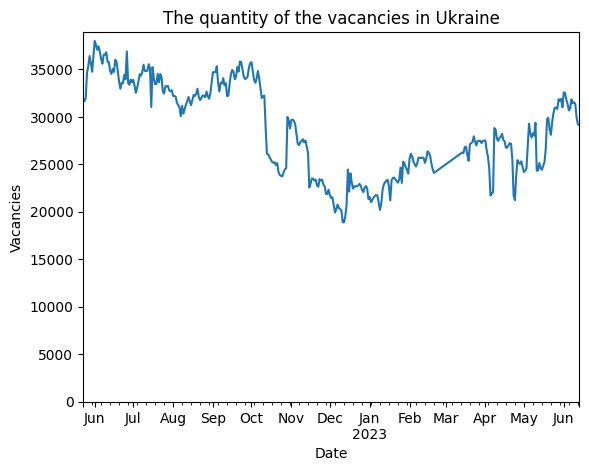

In [24]:
df["Vacancies"].plot()
plt.title("The quantity of the vacancies in Ukraine")
plt.xlabel("Date")
plt.ylabel("Vacancies")
plt.ylim(bottom=0)
plt.show()

In [19]:
df['rolling_mean'] = df['Vacancies'].rolling(window=7).mean()

In [20]:
df

,Vacancies,rolling_mean
Date,,
2022-05-23,31876.0,NaN
2022-05-24,31626.0,NaN
2022-05-25,31928.0,NaN
2022-05-26,34621.0,NaN
2022-05-27,35312.0,NaN
...,...,...
2023-06-09,31507.0,31340.000000
2023-06-10,31335.0,31270.857143
2023-06-11,29922.0,31070.714286


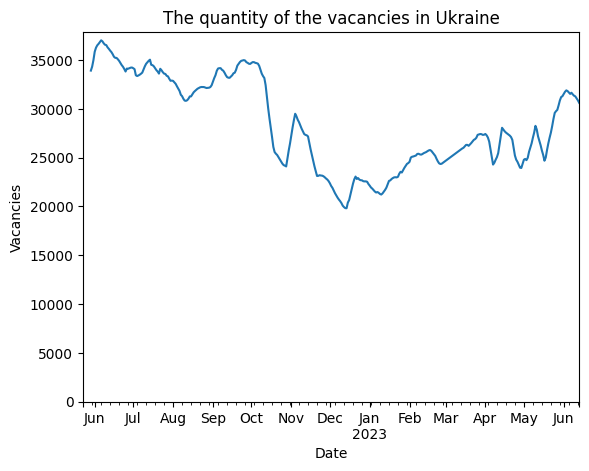

In [23]:
df["rolling_mean"].plot()
plt.title("The quantity of the vacancies in Ukraine")
plt.xlabel("Date")
plt.ylabel("Vacancies")
plt.ylim(bottom=0)
plt.show()

In [22]:
df.describe()

,Vacancies,rolling_mean
count,387.000000,381.000000
mean,28449.512920,28403.834833
std,4798.153844,4703.391439
min,18872.000000,19806.428571
25%,24500.500000,24708.571429
50%,27475.000000,27322.571429
75%,32857.000000,33310.571429
max,37961.000000,37013.714286
